<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/%EA%B8%B0%EC%B6%9C%EB%B3%B5%EC%9B%90/%EA%B8%B0%EC%B6%9C%EB%B3%B5%EC%9B%90_ADP21_%EB%B0%B1%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-1.  시각화 포함 탐색적 자료분석

1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명.(대충 채우라고 알아들음) 

1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.

1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.

1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.

1.6. 3모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명. 현업에서 사용시 주의할 점 등에 대해 기술.

​

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("https://raw.githubusercontent.com/sarthak-srivastava/Student-Performance-Dataset/master/student-mat.csv")
por = pd.read_csv("https://raw.githubusercontent.com/sarthak-srivastava/Student-Performance-Dataset/master/student-por.csv")

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2 sex - student's sex (binary: "F" - female or "M" - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: "U" - urban or "R" - rural)

5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

12 guardian - student's guardian (nominal: "mother", "father" or "other")

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) 
(binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)


Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


In [3]:
# merge datasets
df = pd.concat([mat,por])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [85]:
df['grade_sum'] = df['G1'] + df['G2'] + df['G3']
df['final_grade'] = 'na'
df.loc[(df.grade_sum > 30) & (df.grade_sum <= 60), 'final_grade'] = 1 
df.loc[(df.grade_sum > 0) & (df.grade_sum <= 30), 'final_grade'] = 0
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,grade_sum,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,17,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,16,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,25,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,44,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,26,0


In [90]:
df['final_grade'] = df['final_grade'].astype(dtype='category')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   school       1044 non-null   object  
 1   sex          1044 non-null   object  
 2   age          1044 non-null   int64   
 3   address      1044 non-null   object  
 4   famsize      1044 non-null   object  
 5   Pstatus      1044 non-null   object  
 6   Medu         1044 non-null   int64   
 7   Fedu         1044 non-null   int64   
 8   Mjob         1044 non-null   object  
 9   Fjob         1044 non-null   object  
 10  reason       1044 non-null   object  
 11  guardian     1044 non-null   object  
 12  traveltime   1044 non-null   int64   
 13  studytime    1044 non-null   int64   
 14  failures     1044 non-null   int64   
 15  schoolsup    1044 non-null   object  
 16  famsup       1044 non-null   object  
 17  paid         1044 non-null   object  
 18  activities   1044 non-null   

In [ ]:
df.isnull().sum()

1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명.(대충 채우라고 알아들음) 


In [ ]:
#결측치 행 제거
df = df.dropna(axis = 0)
#결측치 포함 열 제거
df = df.dropna(axis = 1)
#0으로 채우기
df = df.fillna(0)
#위에서 아래 방향으로 채우기(시계열)
df = df.fillna(method='ffill') 
#컬럼별 mean으로 채우기
df = df.fillna(df.mean())

1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.

In [92]:
all_columns = df.columns.tolist()
y_col = ['final_grade']
no_use_col = ['G1','G2','G3','grade_sum']
num_columns = df._get_numeric_data().columns.tolist()
cat_columns = list(set(all_columns) - set(num_columns))
X_col = list(set(all_columns) - set(y_col) - set(no_use_col))
# nom_* 변수는 고유값의 수가 많으므로 개수만 출력해보자
for ind, col in enumerate(df[cat_columns]):
    print(col, '의 고유값 개수는: ', df[col].nunique())

schoolsup 의 고유값 개수는:  2
Mjob 의 고유값 개수는:  5
activities 의 고유값 개수는:  2
internet 의 고유값 개수는:  2
school 의 고유값 개수는:  2
Fjob 의 고유값 개수는:  5
paid 의 고유값 개수는:  2
final_grade 의 고유값 개수는:  2
romantic 의 고유값 개수는:  2
sex 의 고유값 개수는:  2
higher 의 고유값 개수는:  2
guardian 의 고유값 개수는:  3
reason 의 고유값 개수는:  4
famsup 의 고유값 개수는:  2
address 의 고유값 개수는:  2
famsize 의 고유값 개수는:  2
Pstatus 의 고유값 개수는:  2
nursery 의 고유값 개수는:  2


In [29]:
def bar_chart(feature):
  good = df[df['final_grade'] == '1'][feature].value_counts()
  bed = df[df['final_grade'] == '0'][feature].value_counts()
  df1 = pd.DataFrame([good,bed])
  df1.index = ['1','0']
  df1.plot(kind='bar',stacked = True, figsize= (10,5), title = feature)

In [ ]:
for i in cat_columns:
  bar_chart(i)

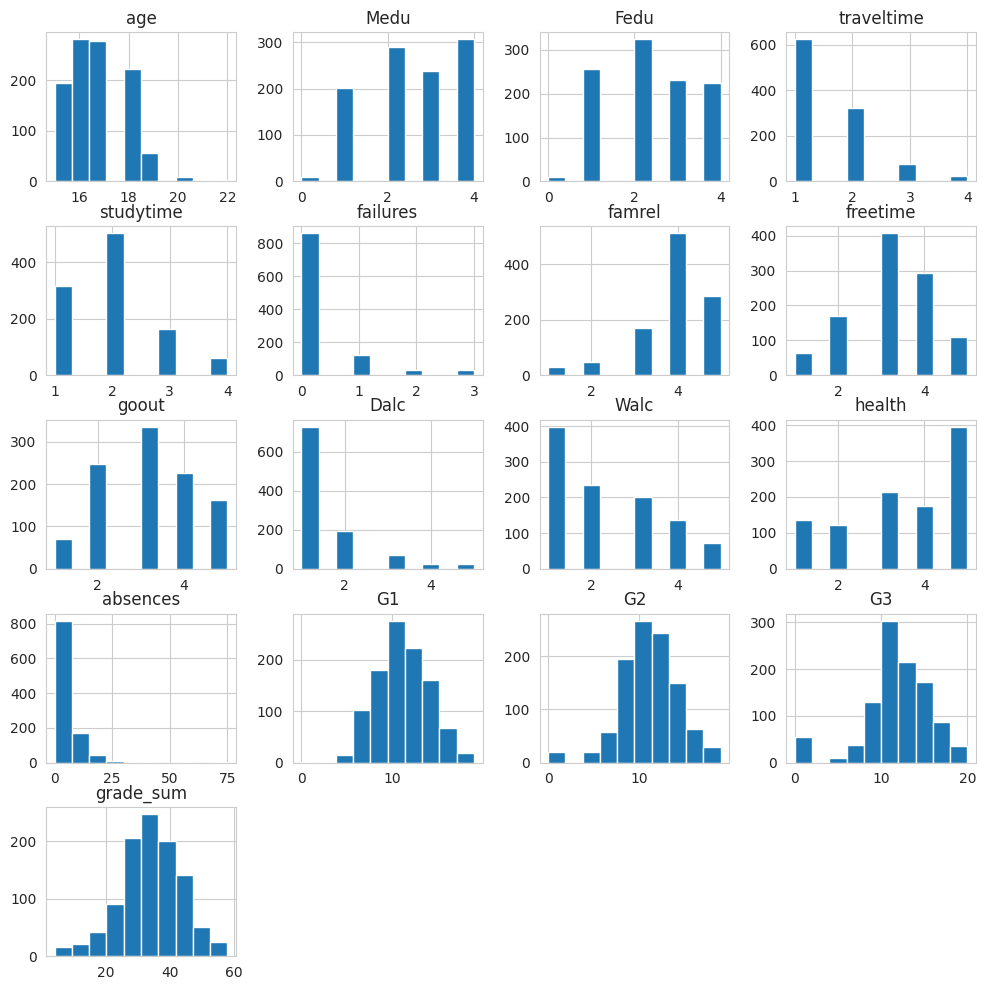

In [34]:
h = df[num_columns].hist(figsize=(12, 12))
#구간이 딱딱 나뉘어져있는 변수들은 범주형변수로 인코딩을 고려할 수 있다.

1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.

가. 부트스트랩
  -  모집단에서 추출한 표본에 대해서 또 다시 재표본을 여러번 추출하여 모델을 평가하거나 데이터의 분포를 파악하는 재표본 추출방법이다. 샘플링을 할 때는 단순랜덤 복원 추출법을 사용하여 동일한 크기의 표본을 여러개 생성하므로, 특정 데이터가 여러 샘플에 포함될 수도 있고 혹은 어떠한 샘플에도 포함되지 않을수도 있다.

나. 일반적인 데이터 분할 및 홀드아웃방법
  - 일반적으로 데이터 분할은 train data(70%), test data(30%)로 비율에 따라 랜덤으로 데이터를 분할한다.

다. K-fold 교차분석 (k-fold cross validation)
  - 데이터를 k개의 집단으로 나눈 뒤 k-1개의 집단으로 분류기를 학습시키고, 나머지 1개의 집단으로 분류기의 성능을 테스트하는 방법이다. 이 과정을 k번 반복하여 모든 데이터가 학습과 검증에 사용될 수 있도록 하고, 최종적으로 k번의 테스트를 통해 얻은 MSE(평균제곱오차)값들의 평균을 해당 모델의 MSE값으로 사용한다.

In [ ]:
#부트스트랩
train_samp = df.sample(frac = 0.7)

#일반적인 데이터 분할
from sklearn.model_selection import train_test_split
X = df[X_col]
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

#K-fold 
from sklearn.model_selection import KFold
X = df[X_col]
y = df[y_col]

# split 개수, 셔플 여부 및 seed 설정
kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
# split 개수 스텝 만큼 train, test 데이터셋을 매번 분할
#for train_index, test_index in kf.split(X):
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
accuracy_history = []
# K-fold 검증 과정으로 실제 랜덤 포레스트 모델을 학습하여 정확도 평균을 내는 방법
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = RandomForestClassifier(n_estimators=5, random_state=0) # 모델 선언
    model.fit(X_train, y_train) # 모델 학습
    y_pred = model.predict(X_test) # 예측 라벨
    accuracy_history.append(accuracy_score(y_pred, y_test)) # 정확도 측정 및 기록
print("각 분할의 정확도 기록 :", accuracy_history)
print("평균 정확도 :", np.mean(accuracy_history))



In [38]:
#일반적인 데이터 분할
from sklearn.model_selection import train_test_split
X = df[X_col]
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)


1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.

=> 세 알고리즘 모두 Classifier와 Regression을 가지고 있다. 


SVM은 차원 수가 많아서 다른 머신러닝 모델이 잘 적용하지 않는 데이터셋에서 좋은 성능을 보여준다.

XGBOOST는 과적합 규제 기능이 있으며 분류와 회귀 영억에서 뛰어난 강점을 가진다. 또한 병렬처리로 속도가 빠르다.

RF는 앙상블 모델으로, 분류에 강하다.


In [95]:
#One hot encoding

from sklearn.model_selection import train_test_split


X = df[X_col]
X_one_hot = pd.get_dummies(X)
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X_one_hot,y,test_size = 0.3, random_state=42)


<ipython-input-96-a5fb0866f1d0>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


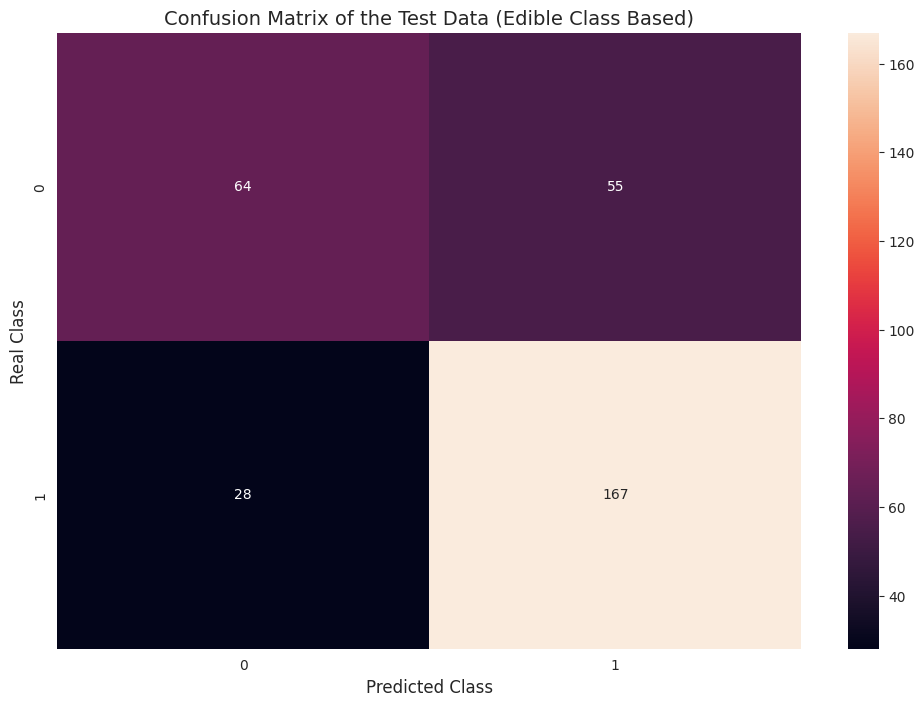

In [96]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train, y_train)

predictions_rf = pd.DataFrame(rf.predict(X_test))
plt.figure(figsize=(12, 8))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions_rf[0])
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data (Edible Class Based)', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()


In [97]:
print(classification_report(y_test, predictions_rf[0], target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.70      0.54      0.61       119
     class 1       0.75      0.86      0.80       195

    accuracy                           0.74       314
   macro avg       0.72      0.70      0.70       314
weighted avg       0.73      0.74      0.73       314



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

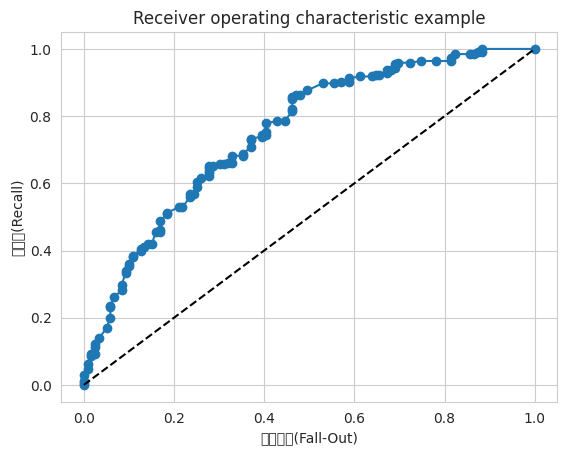

In [99]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, 'o-', label="RandomForest")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [101]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7484076433121019
              precision    recall  f1-score   support

           0       0.76      0.49      0.59       119
           1       0.74      0.91      0.82       195

    accuracy                           0.75       314
   macro avg       0.75      0.70      0.71       314
weighted avg       0.75      0.75      0.73       314



In [104]:
from xgboost import XGBClassifier # model

model = XGBClassifier()
model.fit(X=X_train, y=y_train)
y_pred = model.predict(X_test) # 예측치
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57       119
           1       0.74      0.81      0.77       195

    accuracy                           0.70       314
   macro avg       0.68      0.67      0.67       314
weighted avg       0.69      0.70      0.69       314



# 각 방법론에 대한 parameter tuning은 추후 업로드하겠습니다 !

#2. 릿지 라쏘


2. 연속형 독립변수 여러개의 소규모 데이터. 변수명은 순서대로 x1~x10 이라 의미 없음

​

2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오

​

2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오. alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

​

2-3. 라쏘 회귀로 2-2과 동일한 문제

​


​

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 공부시간에 따른 점수 표
df = pd.DataFrame({'Study time':[3,4,5,8,10,5,8,6,3,6,10,9,7,0,1,2],
		   'Score':[76,74,74,89,92,75,84,82,73,81,89,88,83,40,70,69]})

# 데이터셋 분리
train, test = train_test_split(df, test_size = 0.2, random_state = 2)
X_train = train[['Study time']]
y_train = train['Score']
X_test = test[['Study time']]
y_test = test['Score']

# LinearRegression 진행
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# 잔차 구하기
y_mean = np.mean(y_test) # y 평균값

from sklearn.metrics import r2_score
# r-square 함수사용
r2_score(y_test, y_pred)

0.656822938843801

In [109]:
# $\sum(y 관측값 - y 예측값)^2$ = 예측값에 대한 편차
nomerator = np.sum(np.square(y_test - y_pred)) 

# $sum(y 관측값 - y 평균값)^2$
denominator = np.sum(np.square(y_test - y_mean))
r2 = 1 - nomerator / denominator
rmse = np.sqrt(nomerator/len(y_test))
rmse

3.983960225513578

alpha 0 일 때 5 folds 의 평균 RMSE : 7.251 
r2값: 0.6568229388438008
alpha 0.1 일 때 5 folds 의 평균 RMSE : 7.246 
r2값: 0.657640224624422
alpha 0.2 일 때 5 folds 의 평균 RMSE : 7.242 
r2값: 0.6584527665784667
alpha 0.3 일 때 5 folds 의 평균 RMSE : 7.237 
r2값: 0.6592605855930836
alpha 0.4 일 때 5 folds 의 평균 RMSE : 7.233 
r2값: 0.6600637024537767
alpha 0.5 일 때 5 folds 의 평균 RMSE : 7.228 
r2값: 0.6608621378449644
alpha 0.6 일 때 5 folds 의 평균 RMSE : 7.224 
r2값: 0.6616559123505454
alpha 0.7 일 때 5 folds 의 평균 RMSE : 7.219 
r2값: 0.6624450464544531
alpha 0.8 일 때 5 folds 의 평균 RMSE : 7.215 
r2값: 0.6632295605412158
alpha 0.9 일 때 5 folds 의 평균 RMSE : 7.211 
r2값: 0.6640094748965006
alpha 1 일 때 5 folds 의 평균 RMSE : 7.206 
r2값: 0.6647848097076672


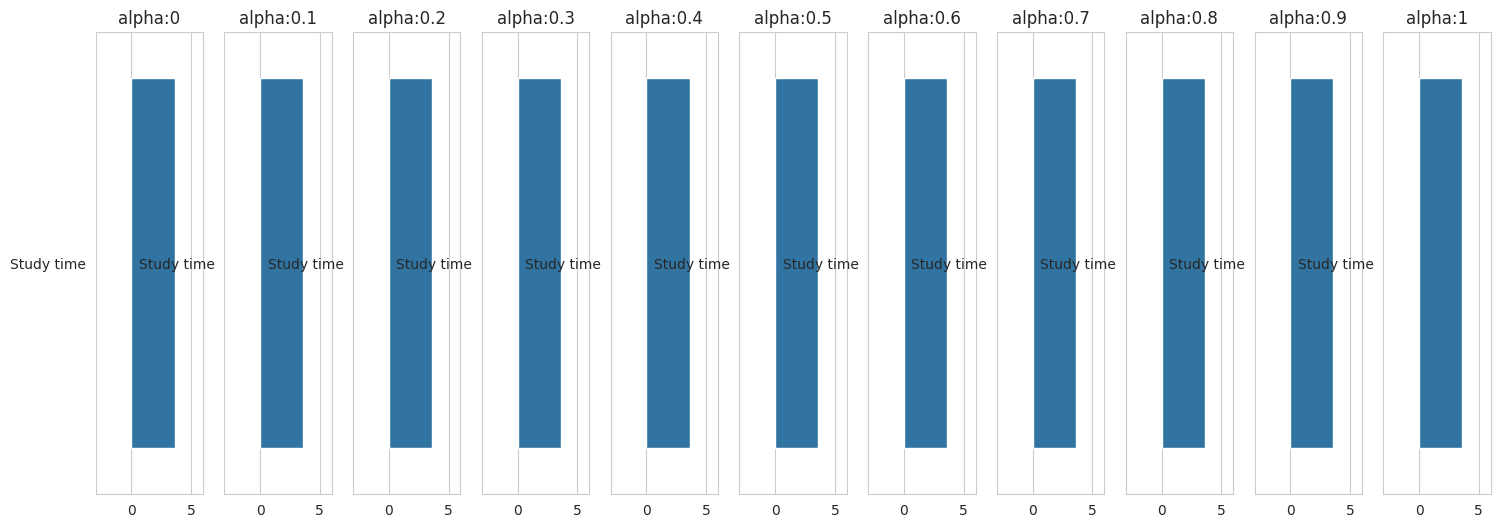

,alpha:0,alpha:0.1,alpha:0.2,alpha:0.3,alpha:0.4,alpha:0.5,alpha:0.6,alpha:0.7,alpha:0.8,alpha:0.9,alpha:1
Study time,3.629683,3.626548,3.623418,3.620293,3.617174,3.61406,3.610952,3.607849,3.604751,3.601659,3.598571


In [114]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=11)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구하고, 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
  
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))
    y_pred = ridge.predict(X_test)
    print('r2값:', r2_score(y_test, y_pred))
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_, index=X_train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

# alpha 값에 따른 컬럼별 회귀계수 출력
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

<ipython-input-117-7b5308fd1bf3>:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+02, tolerance: 2.005e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/s

alpha 0 일 때 5 folds 의 평균 RMSE : 7.251 
r2값: 0.6568229388438008
alpha 0.1 일 때 5 folds 의 평균 RMSE : 7.245 
r2값: 0.659514516401643
alpha 0.2 일 때 5 folds 의 평균 RMSE : 7.238 
r2값: 0.6621695051528198
alpha 0.3 일 때 5 folds 의 평균 RMSE : 7.232 
r2값: 0.6647879050973335
alpha 0.4 일 때 5 folds 의 평균 RMSE : 7.226 
r2값: 0.6673697162351819
alpha 0.5 일 때 5 folds 의 평균 RMSE : 7.220 
r2값: 0.6699149385663687
alpha 0.6 일 때 5 folds 의 평균 RMSE : 7.214 
r2값: 0.6724235720908891
alpha 0.7 일 때 5 folds 의 평균 RMSE : 7.208 
r2값: 0.6748956168087452
alpha 0.8 일 때 5 folds 의 평균 RMSE : 7.202 
r2값: 0.6773310727199382
alpha 0.9 일 때 5 folds 의 평균 RMSE : 7.196 
r2값: 0.6797299398244672
alpha 1 일 때 5 folds 의 평균 RMSE : 7.190 
r2값: 0.6820922181223319


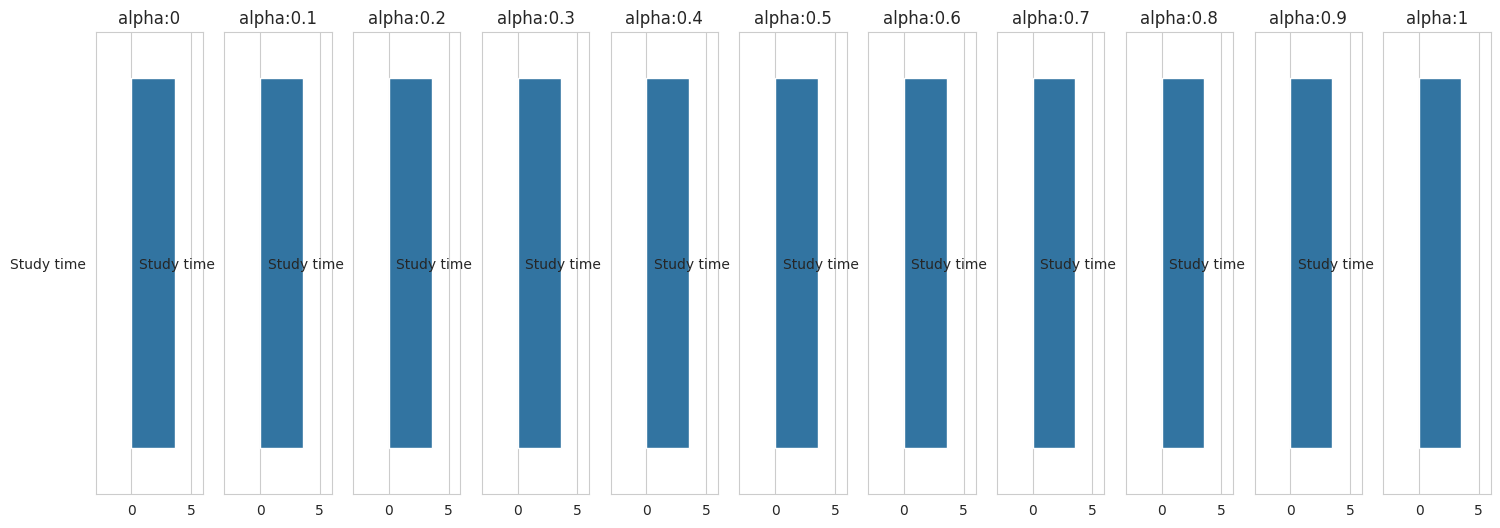

,alpha:0,alpha:0.1,alpha:0.2,alpha:0.3,alpha:0.4,alpha:0.5,alpha:0.6,alpha:0.7,alpha:0.8,alpha:0.9,alpha:1
Study time,3.629683,3.619308,3.608934,3.598559,3.588184,3.57781,3.567435,3.557061,3.546686,3.536311,3.525937


In [117]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Lasso 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=11)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구하고, 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
  
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(lasso, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))
    y_pred = lasso.predict(X_test)
    print('r2값:', r2_score(y_test, y_pred))
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=lasso.coef_, index=X_train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

# alpha 값에 따른 컬럼별 회귀계수 출력
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

#3. 3차 다항회귀

독립변수 하나 종속변수 하나 소규모 데이터.


다항 회귀를 3차까지 적용하고 각 차수별 데이터포인트 스캐터 플롯과 계수와 기울기 선을 그리라고 함(12점) . 

​

In [118]:
import matplotlib.pyplot as plt
import numpy as np
 
def make_data(size=100, noise=1):
    x = np.linspace(-5, 11, size).reshape(-1, 1)
    y = 3*x**2 + 3*x
 
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise  # 노이즈 추가
 
    plt.scatter(x, y)
    plt.suptitle("Sample Data", size=24)
    plt.show()
 
    return x, yy

In [119]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
 
def poly(x, degree=2):
    model = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = model.fit_transform(x)
    return x, x_poly

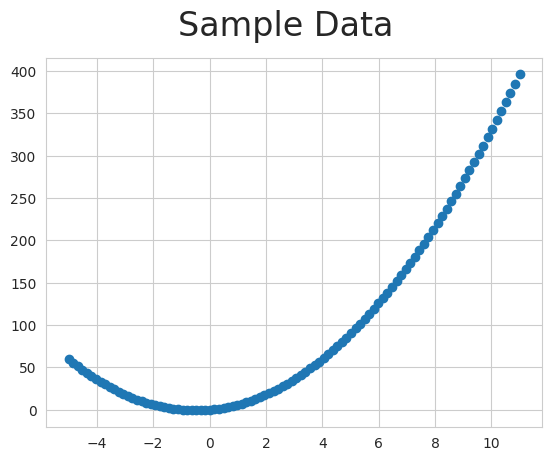

w1:  3.068232334319652
w2:  2.991639145506056
b:  -0.04188413043556238


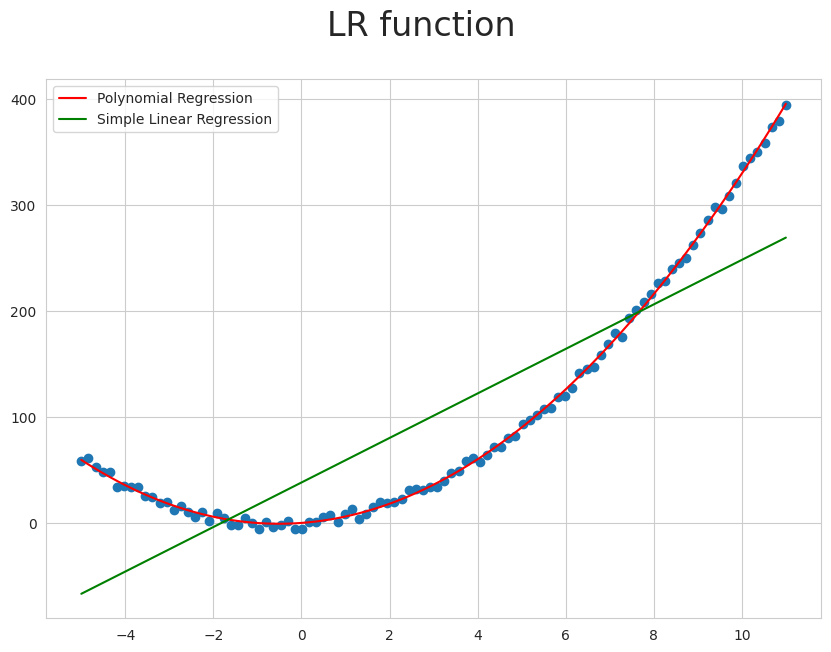

결정계수:  0.9991018426661836
상관계수: 
                 x         y   predict
x        1.000000  0.859435  0.859821
y        0.859435  1.000000  0.999551
predict  0.859821  0.999551  1.000000
MSE:  11.69114007449578


In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
 
def LR(poly_x, x, y):
    SLR_model = LinearRegression()
    model = LinearRegression()
 
    SLR_model.fit(x, y)
    model.fit(poly_x, y)
 
    print("w1: ", model.coef_[0][0])
    print("w2: ", model.coef_[0][1])
    print("b: ",  model.intercept_[0])
 
    SLR_result = SLR_model.predict(x)
    result = model.predict(poly_x)
 
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y)
    plt.plot(x, result, color='red', label='Polynomial Regression')
    plt.plot(x, SLR_result, color='green', label='Simple Linear Regression')
    plt.suptitle("LR function", size=24)
    plt.legend()
    plt.show()
 
    return result
 
x, y = make_data(size=100, noise=6)
x, x_poly = poly(x)
result = LR(x_poly, x, y)
data = np.concatenate((x, y, result), axis=1)
df = pd.DataFrame(data, columns=['x', 'y', 'predict'])
 
print("결정계수: ", r2_score(y, result))
print("상관계수: \n", df.corr())
print("MSE: ", mean_squared_error(y, result))

# 4. 이원분산분석

하나는 abcde 각각을 값으로 갖는 범주형 변수

나머지 두 개는 수치형 연속변수

​

이원분산분석을 수행하고 통계표를 작성하시오.